# Výsledky numerických výpočtů $\lambda_1$ p-laplaciánu

Numerické testy používaly parametry:
- __mesh__ : 6 různých triangulací 2D jednotkové koule
- __order__ : řád FEM elementu pro interpolaci meshe ("polynom" 1,2,3 stupně)
- __degree__ : aproximace Lebesguovy míry s použitím kvadratury stupně = degree (2,3,4,5)


V tabulce je hodnota `err` rozdíl oproti hodnotě $\lambda_1 = 5.7616$ vypočtené v článku

In [1]:
using DrWatson
@quickactivate

In [2]:
using DataFrames
using Gridap, GridapGmsh, GridapMakie
using GLMakie
using PrettyTables

In [3]:
df = collect_results(datadir("simulations"));

┌ Info: Scanning folder /Users/honzapulpan/Projects/p-laplacian/data/simulations for result files.
└ @ DrWatson /Users/honzapulpan/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:115
┌ Info: Added 33 entries.
└ @ DrWatson /Users/honzapulpan/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:191


In [4]:
λ₁_ref = 5.7616
df.err = df[!, :λ₁]  .- λ₁_ref
#df = df[!, [:p, :λ₁, :err, :mesh, :order, :degree, :runtime]];
df = df[!, [:p, :λ₁, :λs, :err, :mesh, :order, :degree, :runtime]];
pretty_table(sort(df, :err), formatters = ft_printf("%5.10f", 2:4))

┌────────┬──────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────┬───────────────┬───────────┬────────┬────────┬──────────────────────────────────────────┐
│      p │           λ₁ │                                                                                                           λs │           err │      mesh │  order │ degree │                                  runtime │
│ Int64? │     Float64? │                                                                                             Vector{Float64}? │       Float64 │   String? │ Int64? │ Int64? │                    Dates.CompoundPeriod? │
├────────┼──────────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────┼───────────────┼───────────┼────────┼────────┼──────────────────────────────────────────┤
│      2 │ 3.1422361257 │  [2.53304, 3.09458, 3.13626, 3.14141, 3.1421, 3.14221, 3.14223, 3.1422

In [5]:
# Nejlepší výsledek pro disk6, order=3, degree=4
display(df[(df.mesh .== "disk6.msh") .& (df.degree .== 4), :λs][1])


12-element Vector{Float64}:
 4.0003720177233175
 5.321095922696406
 5.665495099055582
 5.742198305599194
 5.757839111584343
 5.760891616287752
 5.76147541575538
 5.761586079399369
 5.7616069770355445
 5.761610917064066
 5.761611659428231
 5.7616117992622895

In [6]:
# Nejlepší výsledek pro disk6, order=3, degree=5
display(df[(df.mesh .== "disk6.msh") .& (df.degree .== 5), :λs][1])

12-element Vector{Float64}:
 4.0003720177233175
 5.321095922696406
 5.665495099055582
 5.742198305599194
 5.757839111584343
 5.760891616287752
 5.76147541575538
 5.761586079399369
 5.7616069770355445
 5.761610917064066
 5.761611659428231
 5.7616117992622895

### Použité meshe

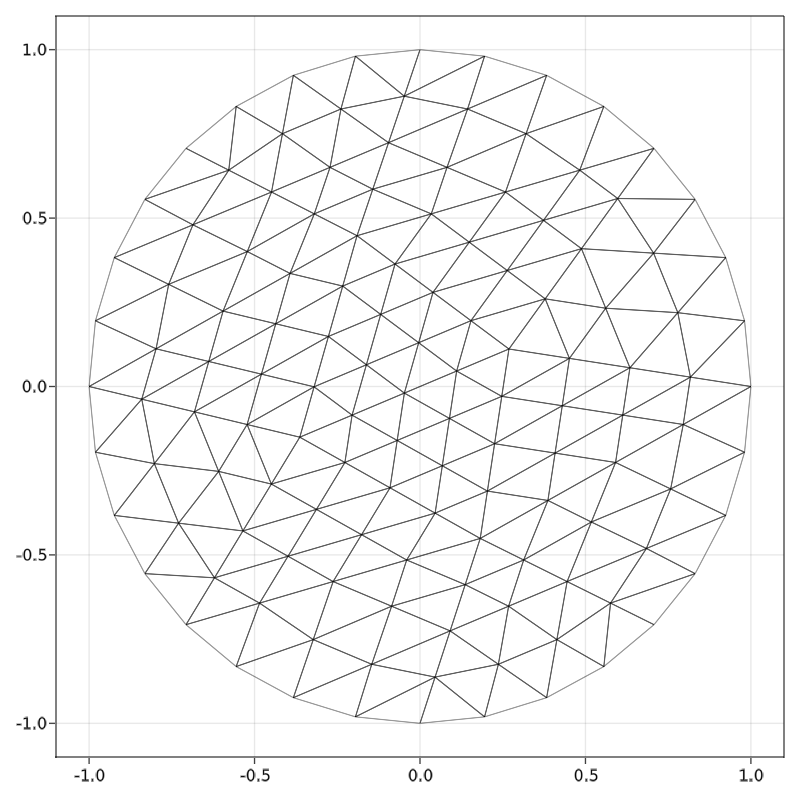

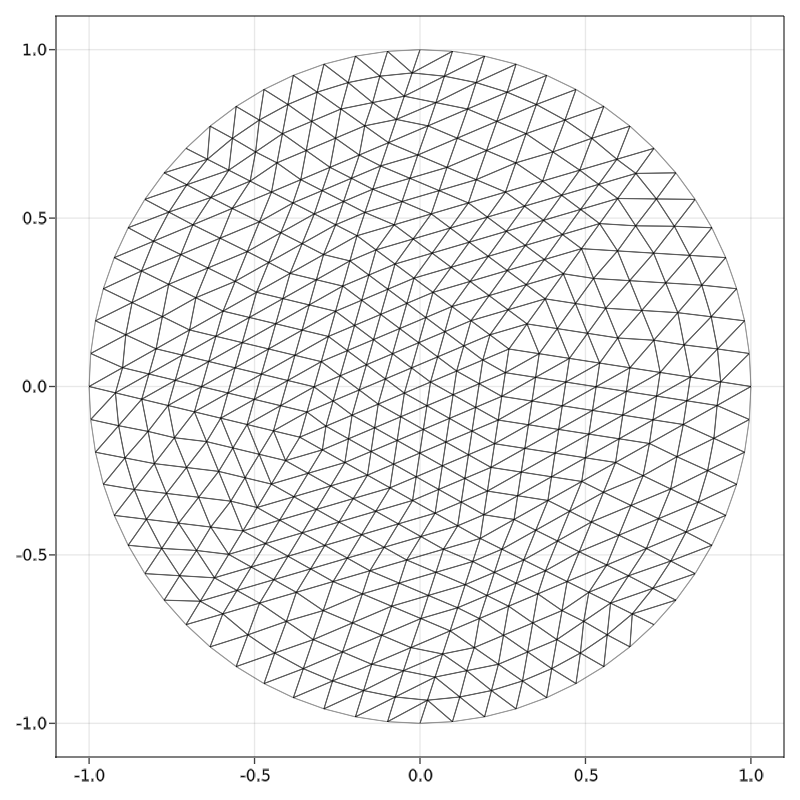

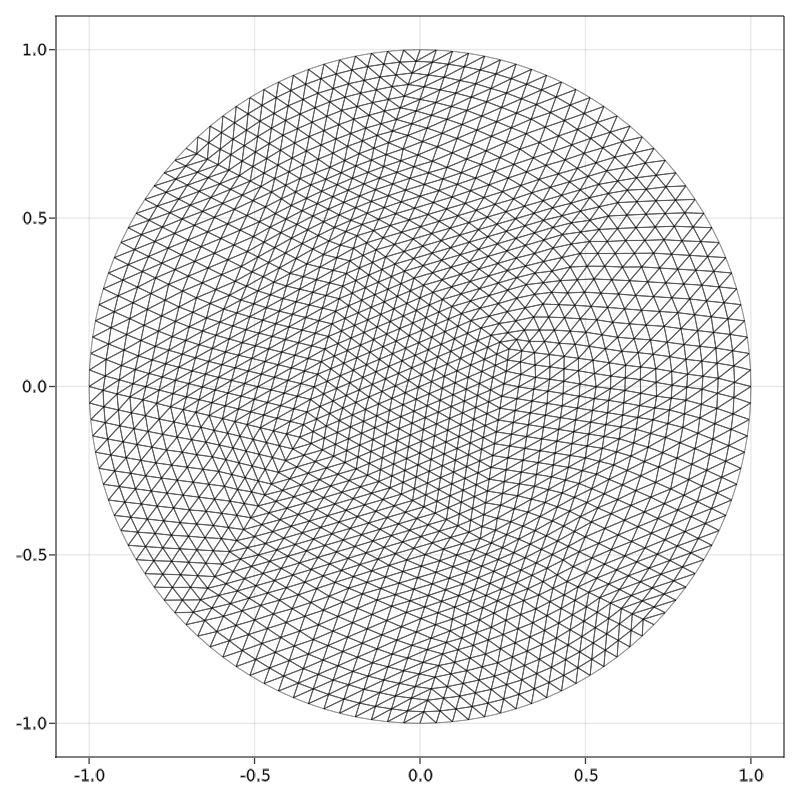

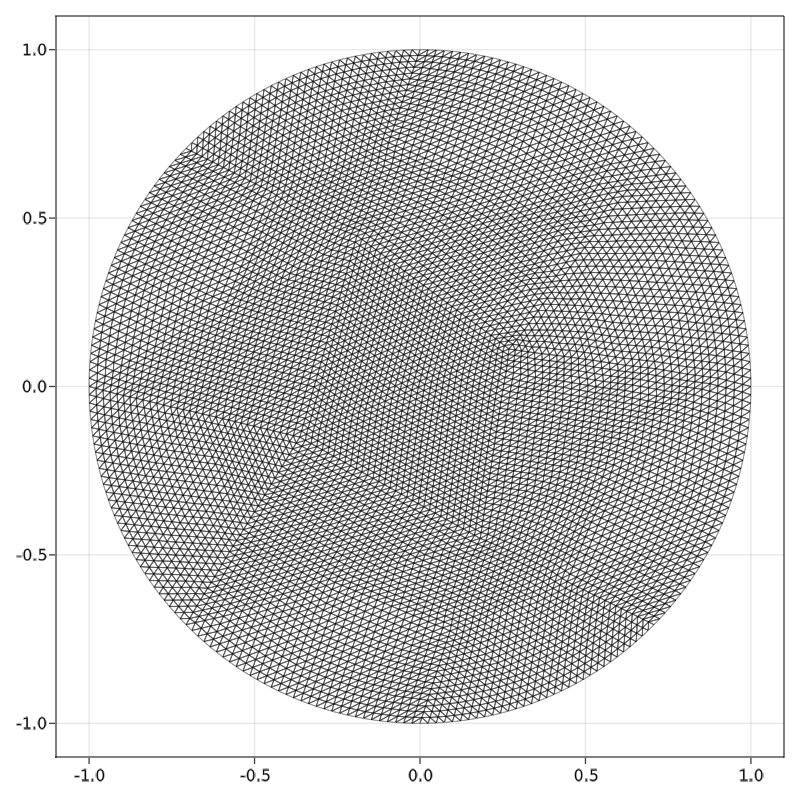

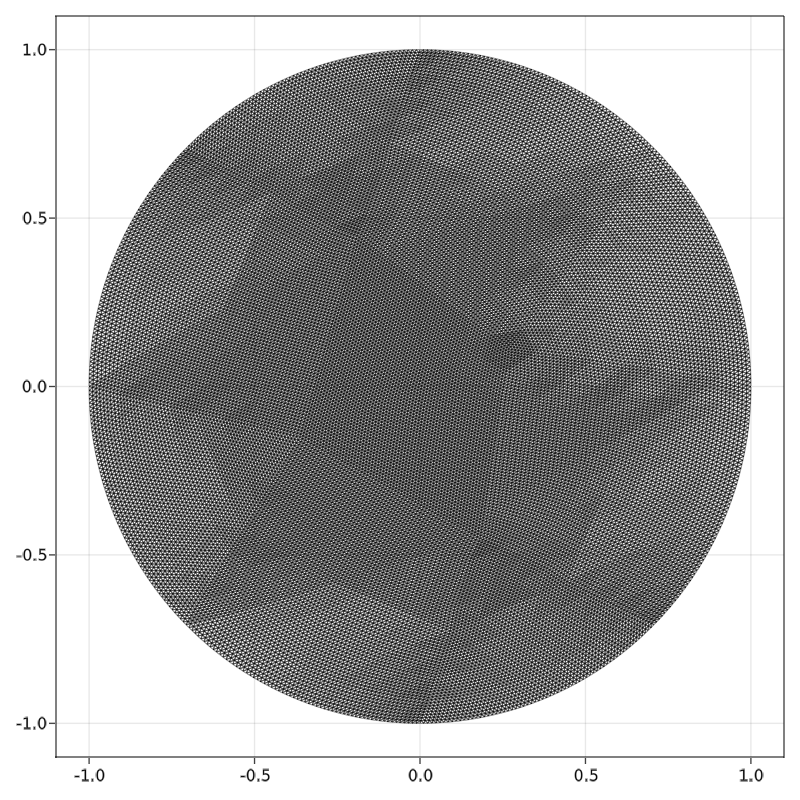

Info    : Reading '/Users/honzapulpan/Projects/p-laplacian/src/mesh/disk3.msh'...
Info    : 10 entities
Info    : 129 nodes
Info    : 256 elements
Info    : Done reading '/Users/honzapulpan/Projects/p-laplacian/src/mesh/disk3.msh'
Info    : Reading '/Users/honzapulpan/Projects/p-laplacian/src/mesh/disk4.msh'...
Info    : 10 entities
Info    : 481 nodes
Info    : 960 elements
Info    : Done reading '/Users/honzapulpan/Projects/p-laplacian/src/mesh/disk4.msh'
Info    : Reading '/Users/honzapulpan/Projects/p-laplacian/src/mesh/disk5.msh'...
Info    : 10 entities
Info    : 1857 nodes
Info    : 3712 elements
Info    : Done reading '/Users/honzapulpan/Projects/p-laplacian/src/mesh/disk5.msh'
Info    : Reading '/Users/honzapulpan/Projects/p-laplacian/src/mesh/disk6.msh'...
Info    : 10 entities
Info    : 7297 nodes
Info    : 14592 elements
Info    : Done reading '/Users/honzapulpan/Projects/p-laplacian/src/mesh/disk6.msh'
Info    : Reading '/Users/honzapulpan/Projects/p-laplacian/src/mesh/dis

In [7]:

GLMakie.inline!(true)
for i in 3:7
    model = GmshDiscreteModel(srcdir("mesh", "disk$i.msh")) ;
    Ω = Triangulation(model)
    fig, _ , plt = wireframe(Ω, color=:black, linewidth=.5, figure=(resolution=(800,800),))
    display(fig)
end    

